## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

In [2]:
nba_data = pd.read_csv('NBA.csv')
nba_data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


## 1. Define Feature Set and Target

In [3]:
X = nba_data[['mp']]
y = nba_data['win_rating']

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

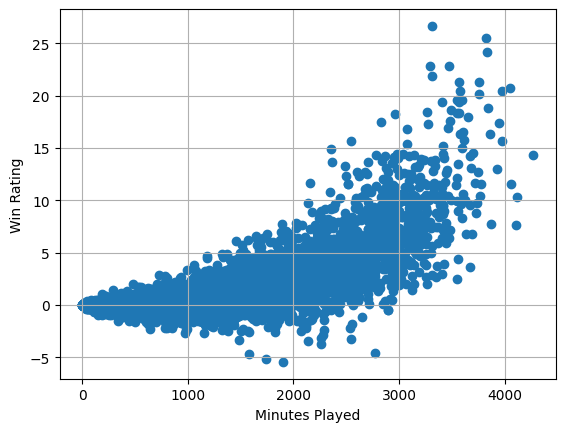

In [4]:
plt.scatter(X, y)
plt.xlabel('Minutes Played')
plt.ylabel('Win Rating')
plt.grid(True)
plt.show;

## 2. Cross-Validation

In [5]:
model  = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([0.00717425, 0.00399995, 0.00400496, 0.00400949, 0.00400615]),
 'score_time': array([0.00182509, 0.00299478, 0.00299191, 0.00299239, 0.00199437]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

In [6]:
min_score = cv_results['test_score'].min()
min_score

0.53447908222725

In [7]:
max_score = cv_results['test_score'].max()
max_score

0.5791776193355005

In [8]:
mean_score = cv_results['test_score'].mean()
mean_score

0.5567301800068911

In [9]:
computational_times = []
mean_scores = []

for K in range(2, 21):
    cv_results = cross_validate(model, X, y, cv = K)
    computational_times.append(cv_results['fit_time'].sum() + cv_results['score_time'].sum())
    mean_scores.append(cv_results['test_score'].mean())

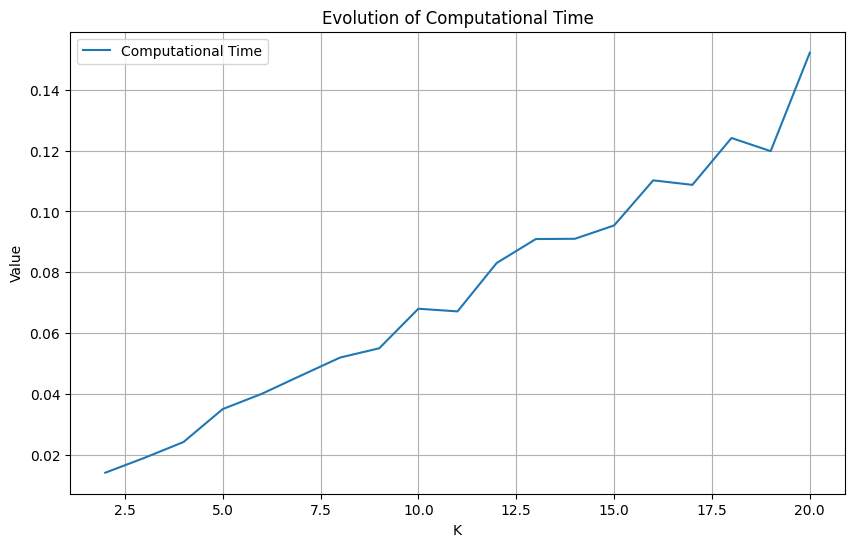

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), computational_times, label='Computational Time')
plt.xlabel('K')
plt.ylabel('Value')
plt.title('Evolution of Computational Time')
plt.grid(True)
plt.legend()
plt.show()

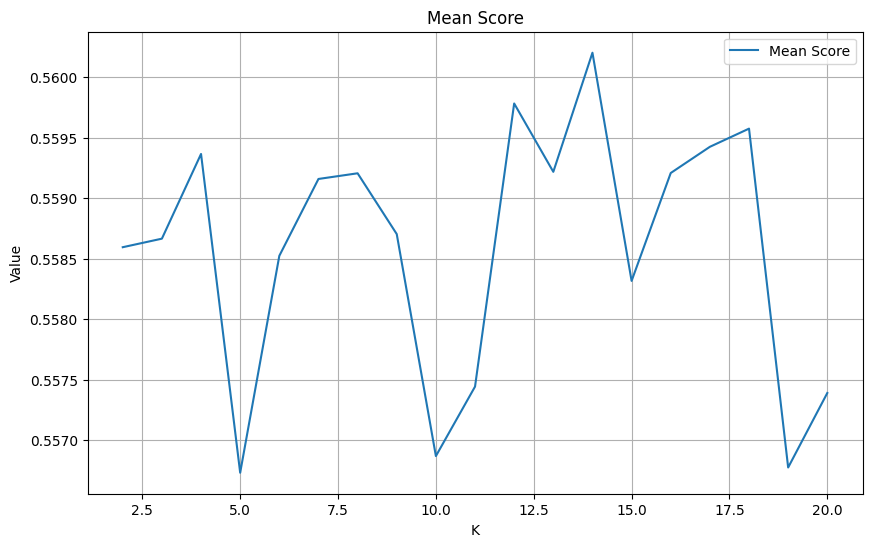

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), mean_scores, label='Mean Score')
plt.xlabel('K')
plt.ylabel('Value')
plt.title('Mean Score')
plt.grid(True)
plt.legend()
plt.show()

## 3. Train the Model

In [12]:
model = model.fit(X.values, y)
model

LinearRegression()

In [13]:
slope = model.coef_[0]
slope

0.0026025799386401945

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [14]:
intercept = model.intercept_
intercept

-1.5463749371639461

🤔 Make sure you understand how to interpret these coefficients before moving on.

## 4. Predict

In [15]:
prediction = model.predict([[1000]])
prediction

array([1.056205])

### ☑️ Test your code

## 5. Improving the Model with More Features

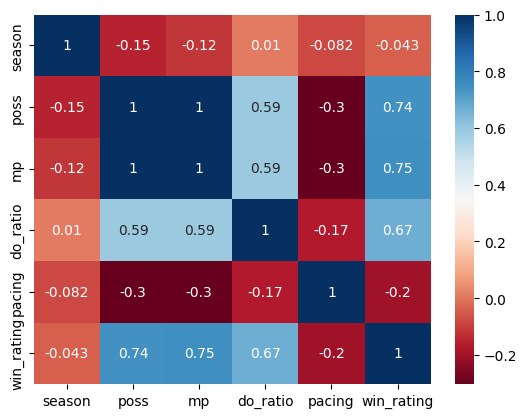

In [16]:
sns.heatmap(nba_data.corr(),annot=True, cmap='RdBu');

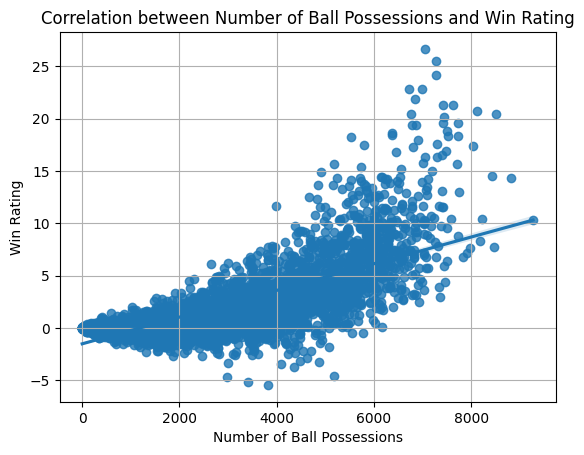

In [17]:
new_features = pd.DataFrame({
    'poss': nba_data['poss'],
    'do_ratio': nba_data['do_ratio'],
    'pacing': nba_data['pacing'],
    'win_rating': nba_data['win_rating']
})

sns.regplot(x='poss', y='win_rating', data=new_features)
plt.xlabel('Number of Ball Possessions')
plt.ylabel('Win Rating')
plt.title('Correlation between Number of Ball Possessions and Win Rating')
plt.grid(True)
plt.show()

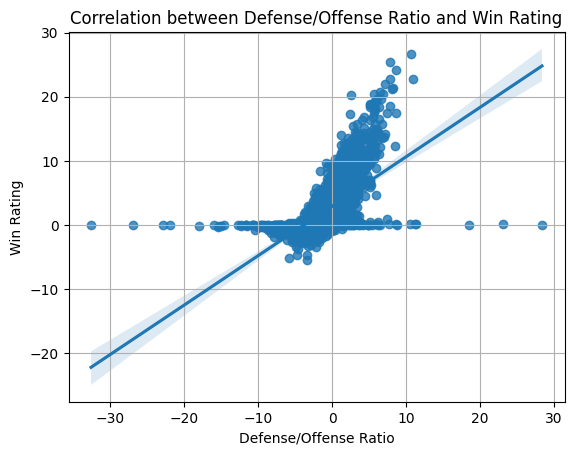

In [18]:
sns.regplot(x='do_ratio', y='win_rating', data=new_features)
plt.xlabel('Defense/Offense Ratio')
plt.ylabel('Win Rating')
plt.title('Correlation between Defense/Offense Ratio and Win Rating')
plt.grid(True)
plt.show()

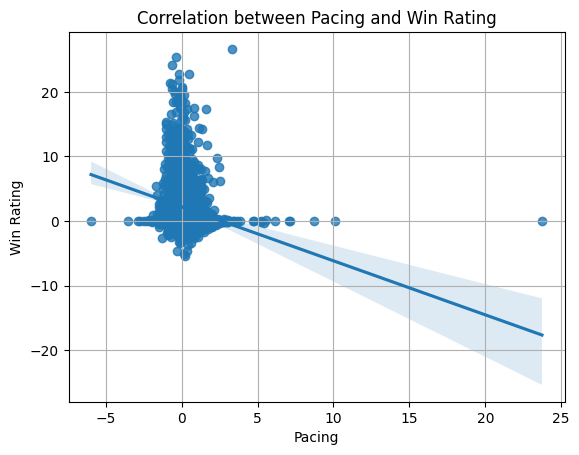

In [19]:
sns.regplot(x='pacing', y='win_rating', data=new_features)
plt.xlabel('Pacing')
plt.ylabel('Win Rating')
plt.title('Correlation between Pacing and Win Rating')
plt.grid(True)
plt.show()

In [20]:
X = nba_data[['mp','do_ratio']]
X

,mp,do_ratio
0,2409,-1.546275
1,2708,0.996587
2,2407,0.242598
3,585,-1.343806
4,2056,-1.813990
...,...,...
3995,565,-1.761425
3996,1785,0.907199
3997,378,0.848178
3998,156,-6.298906


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [21]:
model2 = LinearRegression()
mean_2_feat_score = cross_val_score(model2, X, y, cv=5).mean()
mean_2_feat_score

0.6317728310765245